## `Latar Belakang`

Sebuah perusahaan yang bergerak dibidang **Store Retailer** ingin melakukan suatu promosi untuk pelanggannya. Tetapi perusahaan masih kesulitan dalam menentukan pelanggan mana yang seharusnya promosi tersebut, sehingga perusahaan meminta tim _Data Analyst_ untuk mengecek pelanggan mana yang berpotensi menerima promosi tersebut. Hal ini dimaksudkan agar promosi tepat sasaran.

## `Problem Statement`
Seperti yang telah disebutkan diatas, perusahaan ingin mengetahui segmen pelanggan yang seperti apa yang akan menerima promosi atau yang tidak akan menerima promosi tersebut. Hal ini akan berguna bagi perusahaan, sehingga perusahaan dapat menerima keuntungan yang maksimal atau bisa dikatakan strategi yang digunakan memiliki efektifitas yang baik.

Untuk mencapai hal diatas, kita sebagai tim Data Analyst akan mencoba menjawab pertanyaan-pertanyaan berikut:
1. Apakah campaign cukup **efektif** ? Asumsi bahwa tingkat kefektifan campaign dilihat dari number amount of spent (jumlah spent dari customer)
2. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **campaign** ?
3. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **product** ?
3. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **place** ?
4. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **amount of spent** ?
<br> --------------------------------------------------------------------------------------------------------------------------------------------
2. Pelanggan bisa dikategorikan/dikelompokkan berdasarkan apa saja ? (education, age_category, income_category, marital_status, has_child)
3. Bagaimana pengaruh kategori-kategori tersebut terhadap jumlah uang yang dikeluarkan ? Urutkan paling banyak di kategori mana ??? Dalam 2 tahun terakhir (per kategori barang ???)
4. Place mana yang paling memberikan keuntungan ???
5. jenis pelanggan mana yang paling banyak menerima campaign disetiap campaignnya ?

**kategori pelanggan mana yang paling banyak menerima campaign disetiap campaignnya, kemudian kerucutkan lagi berdasarkan amount spent dan place ???? Atau mungkin dilihat terlebih dahulu hubungan antara categorical2 column dengan promotion**

## `Data`
Untuk menjawab pertanyaan di atas, kita akan menganalisa berdasarkan data supermarket customers yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

1. Numerical: 
- Discrete: Kidhome, Teenhome, num_children, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
- Continue: Year_Birth, age, Income

2. Categorical:
- ordinal : Education, age_category, income_category
- nominal : ID, Marital_Status, has_child, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, 

3. Datetime
<br>
Dt_Customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append(r"C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\notebooks")
import function1 as fnc1

pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', parse_dates=['Dt_Customer'])
df.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,never,1,1,2,5
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,never,8,2,10,4
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,never,2,0,4,6
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,never,5,3,6,5


In [3]:
fnc1.checkdf(df)

----------------- df.info() -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   age                  2240 non-null   int64         
 3   age_category         2240 non-null   object        
 4   Education            2240 non-null   object        
 5   Marital_Status       2240 non-null   object        
 6   Income               2240 non-null   float64       
 7   income_category      2240 non-null   object        
 8   Kidhome              2240 non-null   int64         
 9   Teenhome             2240 non-null   int64         
 10  num_children         2240 non-null   int64         
 11  has_child            2240 non-null   object        
 12  Dt_Customer          2240 non-null   datetim

None

,ID,Year_Birth,age,Income,Kidhome,Teenhome,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5597.126786,1968.909375,44.118750,52235.511102,0.444196,0.506250,0.950446,2013-07-10 10:01:42.857142784,49.109375,0.009375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,4.084821,2.662054,5.790179,5.316518
min,1.000000,1940.000000,16.000000,1730.000000,0.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2830.500000,1959.000000,36.000000,35538.750000,0.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000
50%,5468.000000,1970.000000,43.000000,51381.500000,0.000000,0.000000,1.000000,2013-07-08 12:00:00,49.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,6.000000
75%,8430.500000,1977.000000,54.000000,68325.000000,1.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,0.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,73.000000,666666.000000,2.000000,2.000000,3.000000,2014-06-29 00:00:00,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,28.000000,13.000000,20.000000
std,3246.613766,11.696638,11.733463,25055.289473,0.538398,0.544538,0.751803,NaN,28.962453,0.096391,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,2.778714,2.923101,3.250958,2.426645


,age_category,Education,Marital_Status,income_category,has_child,accept_campaign
count,2240,2240,2240,2240,2240,2240
unique,4,4,4,3,2,2
top,middle-aged adults,Graduation,Married,medium income,Yes,never
freq,1124,1127,1444,1120,1602,1631


>### 1. Is the campaign effective?

In [4]:
df.accept_campaign.value_counts()

accept_campaign
never     1631
accept     609
Name: count, dtype: int64

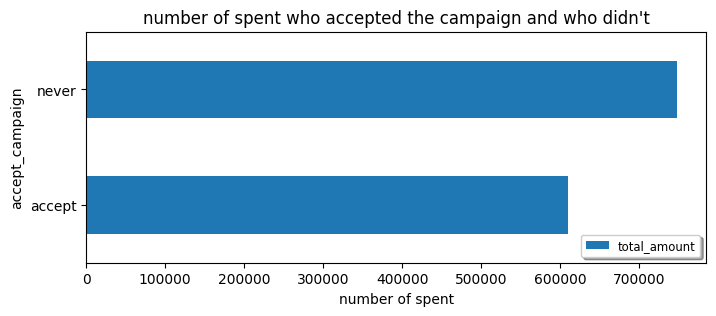

In [5]:
df.groupby('accept_campaign').agg({'total_amount':'sum'}).plot(kind='barh', title="number of spent who accepted the campaign and who didn't", xlabel='number of spent', figsize=(8,3))
plt.xticks(rotation=360)
plt.legend(loc='lower right', fontsize='small', fancybox=True, shadow=True);
# plt.annotate('max value', xytext=(30,1), xy=(10,1), verticalalignment='center')

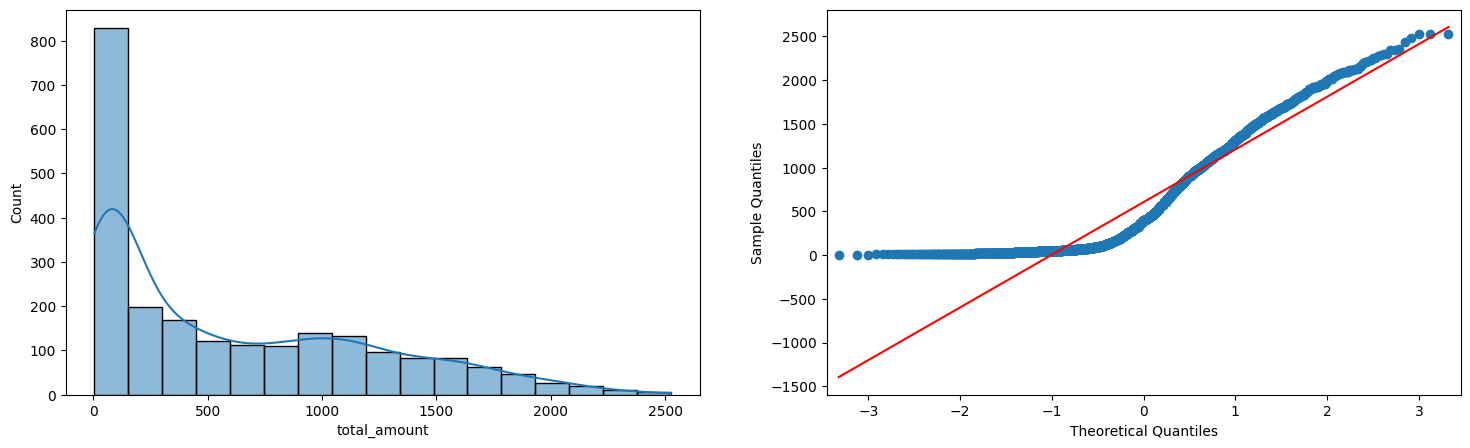

In [6]:
# make spent_category column in order to test whether the campaign makes the customer high spent or not ?

import statsmodels.api as sm
# check the distribution of total_amount first

# plot the graph to check the distribution
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.histplot(df['total_amount'], kde=True, ax=ax1)
sm.qqplot(df['total_amount'], line='s', ax=ax2)
plt.show()

- the distribution of total_amount data is not normal. So, we can use median as measure of central tendency and MAD as spreading value to make categorical column. But in this context, we only devided into **2 categories**, **high spent** and **low-medium spent**. Because we want to more focused on which customers spend more (high spend)

In [7]:
# make spent_category column

# median
median = df['total_amount'].median()

# MAD
from scipy.stats import median_abs_deviation
mad = median_abs_deviation(df['total_amount'])

df['spent_category'] = df.apply(fnc1.category, args=('total_amount', 'spent',median,mad,0,0,'not normal'), axis=1)

# make only 2 category: low-medium spent and high spent
df['spent_category'] = df['spent_category'].replace({'low spent' : 'low-medium spent', 'medium spent' : 'low-medium spent'})
df.head()

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,spent_category
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.0,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7,high spent
1,2174,1954,60,old adults,Graduation,Single,46344.0,medium income,1,1,2,Yes,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,0,never,1,1,2,5,low-medium spent
2,4141,1965,48,middle-aged adults,Graduation,Married,71613.0,high income,0,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,0,never,8,2,10,4,high spent
3,6182,1984,30,adults,Graduation,Married,26646.0,low income,1,0,1,Yes,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,0,never,2,0,4,6,low-medium spent
4,5324,1981,33,adults,PhD,Married,58293.0,medium income,1,0,1,Yes,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,0,never,5,3,6,5,low-medium spent


##### perform hypothesis testing for proportion using Two Sample Z-Test

*assumption : whether a campaign is effective or not can be seen from the amount spent by the customer*
- Ho: total amount of customer who accept the campaign = total amount of customer who NEVER accept the campaign
- Ha: total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign

significance level (alpha) = 0.5

In [8]:
# customer data which accept campaign and has high spent
df_new = df.loc[df['accept_campaign'] == 'accept']

# customer data which never accept the campaign and low-medium spent
df_old = df.loc[df['accept_campaign'] == 'never']

In [9]:
# check the conversion rate of accept campaign customers
display(df_new['spent_category'].value_counts(),
f"conversion rate (proporsi spent) pada kelompok accept campaign = {(370/(df_new['spent_category'].value_counts()[0]+df_new['spent_category'].value_counts()[1]))*100}%")

spent_category
high spent          370
low-medium spent    239
Name: count, dtype: int64

'conversion rate (proporsi spent) pada kelompok accept campaign = 60.75533661740559%'

In [10]:
# check the conversion rate of never accept campaign customers
display(df_old['spent_category'].value_counts(),
f"conversion rate (proporsi spent) pada kelompok never accept campaign = {(453/(df_old['spent_category'].value_counts()[0]+df_old['spent_category'].value_counts()[1]))*100}%")

spent_category
low-medium spent    1178
high spent           453
Name: count, dtype: int64

'conversion rate (proporsi spent) pada kelompok never accept campaign = 27.774371551195586%'

In [11]:
# number of spent category
df_pivot = df[['accept_campaign','spent_category']].pivot_table(
    index= 'accept_campaign',
    columns= 'spent_category',
    values= 'spent_category',
    aggfunc= len
)

df_pivot

spent_category,high spent,low-medium spent
accept_campaign,,
accept,370,239
never,453,1178


In [12]:
# number of accept campaign and high spent
n_high_accept = df_pivot.loc['accept', 'high spent']

# number of never accept campaign and high spent
n_high_never = df_pivot.loc['never', 'high spent']

# number of accept customers
n_accept = df_pivot.sum(axis=1)['accept']

# number of never accept customers
n_never = df_pivot.sum(axis=1)['never']


# perform statistical test
from statsmodels.stats.proportion import proportions_ztest 

stat, pvalue = proportions_ztest(
    count= [n_high_accept, n_high_never],   # jumlah spent di kelompok accept dan kelompok never accept
    nobs= [n_accept, n_never],              # jumlah seluruh kelompok accept dan jumlah seluruh kelompok never accept
    alternative='larger'                    # Ha (lebih besar)
)

pvalue = pvalue/2

# conclusion

if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Menerima Ho.
    Kita punya cukup bukti untuk mengatakan bahwa campaign tidak efektif (total amount of customer who accept the campaign = total amount of customer who NEVER accept the campaign).
    (Proporsinya TIDAK berbeda signifikan)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Menerima Ha.
    Kita punya cukup bukti untuk mengatakan bahwa campaign efektif (total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign).
    (Proporsinya berbeda signifikan)
    ''')


    Pvalue = 1.1890009998712533e-47. Pvalue <= 0.05. Menerima Ha.
    Kita punya cukup bukti untuk mengatakan bahwa campaign efektif (total amount of customer who accept the campaign > total amount of customer who NEVER accept the campaign).
    (Proporsinya berbeda signifikan)
    


**_Insight:_**
<br>
It turns out that even though the number of customers who accept the campaign is less, which is **27.19%**, but after doing inferential statistics using the proportion **two sample z-test**, it turns out that the campaign can be said to be **effective** or **successful** because customers who accept the campaign **spend more** of their money than those who never accept the campaign.
<br>
Although when viewed from the graph the total amount generated from the **never accept campaign group** is **more** than the group that accepts the campaign (at least once), this **bias** can occur because the **number of data** that never accepts the campaign is **more** than those who accept the campaign, so **naturally** the total amount is more. But, we already validate using statistical test, that the campaign has indeed been **effective**.

In [13]:
df_accept = df_new.copy()
df_accept

,ID,Year_Birth,age,age_category,Education,Marital_Status,Income,income_category,Kidhome,Teenhome,num_children,has_child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_amount,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,accept_campaign,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,spent_category
0,5524,1957,55,middle-aged adults,Graduation,Single,58138.000000,medium income,0,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,1,accept,8,10,4,7,high spent
8,4855,1974,39,adults,PhD,Married,30351.000000,low income,1,0,1,Yes,2013-06-06,19,0,14,0,24,3,3,2,46,1,0,0,0,0,0,1,accept,3,0,2,9,low-medium spent
9,5899,1950,64,old adults,PhD,Married,5648.000000,low income,1,1,2,Yes,2014-03-13,68,0,28,0,6,1,1,13,49,1,0,0,1,0,0,0,accept,1,0,0,20,low-medium spent
14,2114,1946,66,old adults,PhD,Single,82800.000000,high income,0,0,0,No,2012-11-24,23,0,1006,22,115,59,68,45,1315,1,1,0,0,0,1,1,accept,7,6,12,3,high spent
17,6565,1949,64,old adults,Master,Married,76995.000000,high income,0,1,1,Yes,2013-03-28,91,0,1012,80,498,0,16,176,1782,2,1,0,0,0,0,0,accept,11,4,9,5,high spent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,9405,1954,58,middle-aged adults,PhD,Married,52869.000000,medium income,1,1,2,Yes,2012-10-15,40,0,84,3,61,2,1,21,172,3,0,0,0,0,0,1,accept,3,1,4,7,low-medium spent
2227,2437,1989,24,adults,Graduation,Married,41580.000000,medium income,0,0,0,No,2013-06-03,69,0,861,138,461,60,30,61,1611,1,1,0,0,1,0,0,accept,6,5,12,3,high spent
2228,2863,1970,43,middle-aged adults,Graduation,Single,53187.000000,medium income,1,2,3,Yes,2013-08-23,67,0,738,20,172,52,50,20,1052,6,1,0,0,1,0,0,accept,2,3,10,7,high spent
2238,5250,1943,70,old adults,Master,Widow,71335.500000,high income,0,0,0,No,2013-10-30,75,0,532,126,490,164,126,126,1564,1,0,0,0,0,1,1,accept,5,5,11,1,high spent


>### 2. How does each categorical columns affect accept campaigns (promotion)?

**Categorical columns : age category, education, income category, marital status, and has child/not**

In [14]:
display(
        "Table contingency age category",
        df.pivot_table(index='age_category', columns= 'accept_campaign', values= 'ID', aggfunc= 'count'), # age category
        
        "Table contingency education",
        df.pivot_table(index='Education', columns= 'accept_campaign', values= 'ID', aggfunc= 'count'), # Education
        
        "Table contingency income category",
        df.pivot_table(index='income_category', columns= 'accept_campaign', values= 'ID', aggfunc= 'count'), # income_category
        
        "Table contingency marital status",
        df.pivot_table(index='Marital_Status', columns= 'accept_campaign', values= 'ID', aggfunc= 'count'), # Marital_Status
        
        "Table contingency has child",
        df.pivot_table(index='has_child', columns= 'accept_campaign', values= 'ID', aggfunc= 'count') # has_child
)

'Table contingency age category'

accept_campaign,accept,never
age_category,,
adults,213,626
middle-aged adults,311,813
old adults,83,191
teenagers,2,1


'Table contingency education'

accept_campaign,accept,never
Education,,
Basic,7,47
Graduation,298,829
Master,146,427
PhD,158,328


'Table contingency income category'

accept_campaign,accept,never
income_category,,
high income,277,296
low income,78,469
medium income,254,866


'Table contingency marital status'

accept_campaign,accept,never
Marital_Status,,
Divorced,69,163
Married,362,1082
Single,151,336
Widow,27,50


'Table contingency has child'

accept_campaign,accept,never
has_child,,
No,285,353
Yes,324,1278


#### Using hypothesis testing for proportion using **chi-square test**
Test independency/relationship between 2 categorical variables (**each categorical columns** and **promotion columns**). We will test whether the each categorical columns is independence/dependence to the promotion columns (campaign).
<br>
- Ho: each categorical columns dan campaign tidak terkait/independent (proporsinya sama)
- Ha: each categorical columns dan campaign terkait/dependent (proporsinya berbeda signifikan)

In [15]:
#import chi2_contingency library
from scipy.stats import chi2_contingency

# campaign columns
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# categorical columns
category = ['age_category', 'Education', 'income_category', 'Marital_Status', 'has_child']

for cat in category:
    # input dari function chi2_contingency ini berupa crosstab
    stat, pvalue, dof, expexted = chi2_contingency(df_accept.groupby(cat)[cols].agg('sum'))

    # conclusion
    if pvalue > 0.05:
        print(f'''
        Pvalue = {pvalue}. Pvalue > 0.05. Menerima Ho.
        Kita TIDAK punya cukup bukti untuk mengatakan bahwa {cat} dan campaign terkait/dependent.
        (Proporsinya TIDAK berbeda signifikan)
        ''')

    else:
        print(f'''
        Pvalue = {pvalue}. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa {cat} dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        ''')


        Pvalue = 0.015401978861993548. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa age_category dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 0.009958599935671697. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa Education dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 1.6781191250898553e-54. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa income_category dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 0.0029113016999780706. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa Marital_Status dan campaign terkait/dependent.
        (Proporsinya berbeda signifikan)
        

        Pvalue = 3.753705651613539e-29. Pvalue <= 0.05. Menerima Ha.
        Kita punya cukup bukti untuk mengatakan bahwa

**_insight_**:
<br>
Kita punya cukup bukti untuk mengatakan bahwa semua kategorikal kolom di atas **berpengaruh(dependent)** ke campaign columns

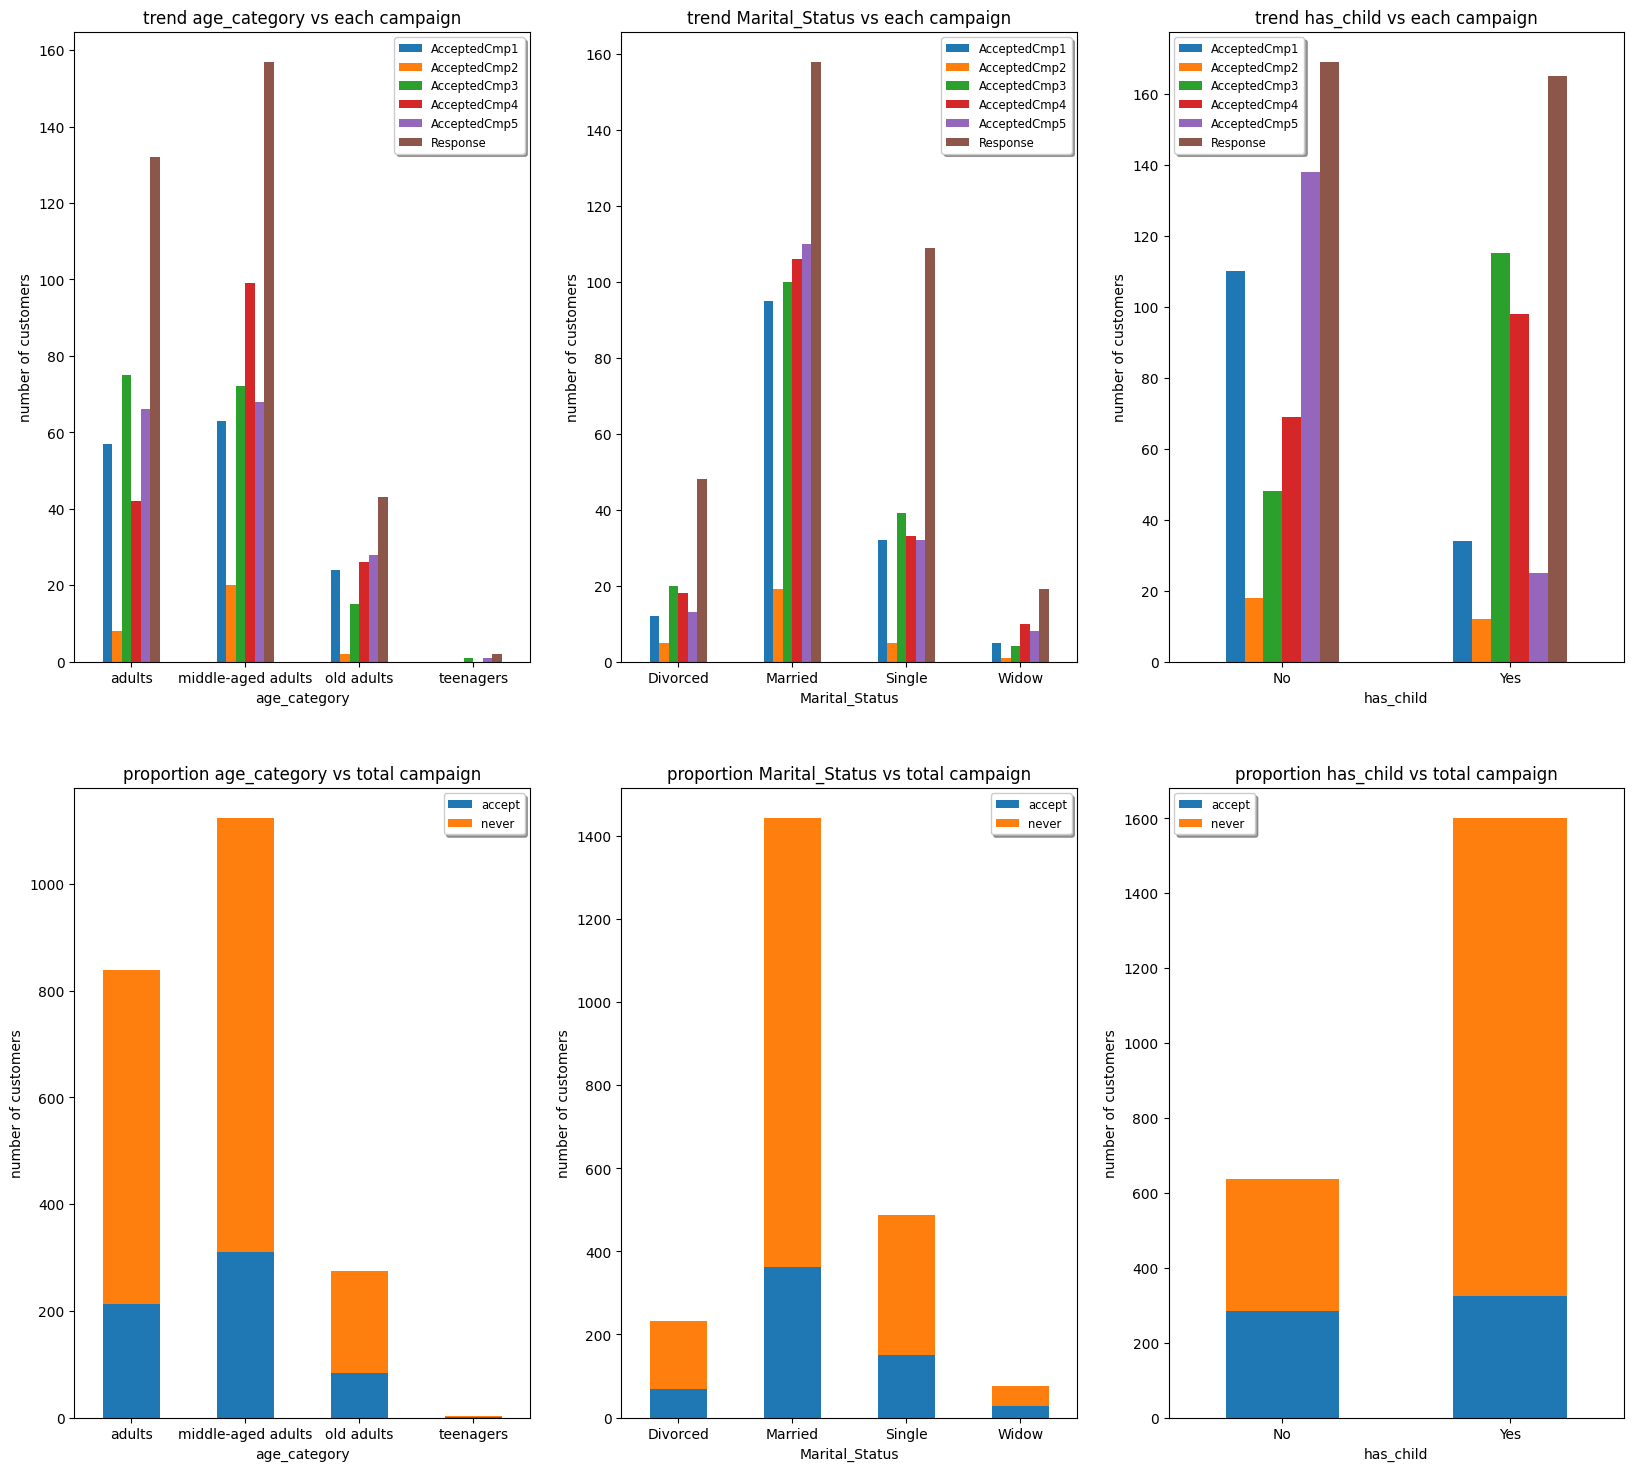

In [16]:
# plot age_category, Marital_Status, has_child
fig, ((ax1,ax2,ax3), (ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=3, figsize=(20,18))

axEach = [ax1,ax2,ax3]
axTotal = [ax6,ax7,ax8]
colList = ['age_category', 'Marital_Status', 'has_child']
titleEach = ['trend age_category vs each campaign', 'trend Marital_Status vs each campaign', 'trend has_child vs each campaign']
titleTotal = ['proportion age_category vs total campaign', 'proportion Marital_Status vs total campaign', 'proportion has_child vs total campaign']

for i in zip(axEach, axTotal, colList, titleEach, titleTotal):
    # data
    df.groupby(i[2])[cols].agg('sum').plot(kind='bar', ax=i[0])
    df.pivot_table(index=i[2], columns= 'accept_campaign', values= 'ID', aggfunc= 'count').plot(kind='bar', stacked=True, ax=i[1])
    # set title
    i[0].set_title(i[3])
    i[1].set_title(i[4])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of customers')
    i[1].set_ylabel('number of customers')
    # set legend
    i[0].legend(loc='best', fontsize='small', fancybox=True, shadow=True)
    i[1].legend(loc='best', fontsize='small', fancybox=True, shadow=True)

**_Insight_**:
1. **Age categories** --> insight can be drawn that `middle-aged adults (40 years old through 59 years old)` accept more campaigns than other age categories.
2. **Marital status** --> insight can be drawn that `married` accept more campaigns than other income category.
3. **Has child/not** --> insight can be drawn that `has no child` accept more campaigns than customer who has child.

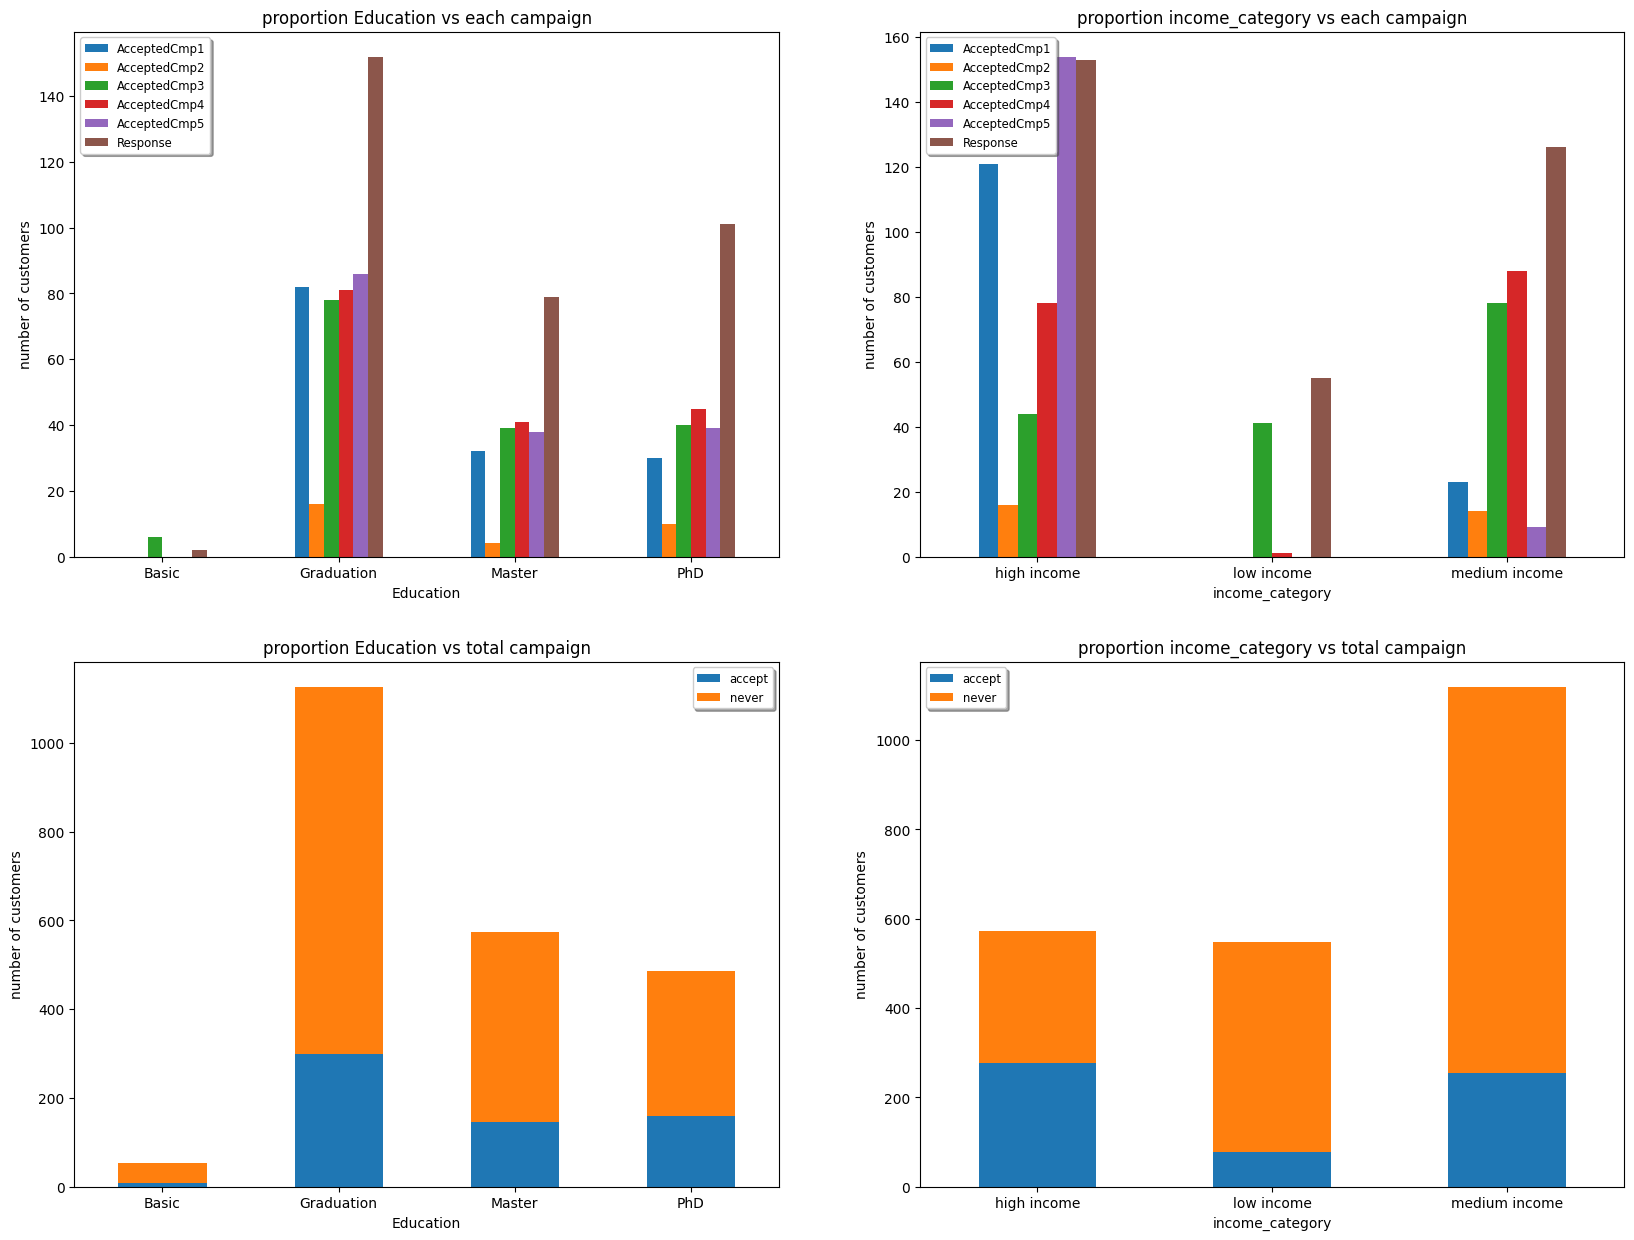

In [17]:
# make fig and axes
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

axEach = [ax1,ax2]
axTotal = [ax3,ax4]
colList = ['Education', 'income_category']
titleEach = ['proportion Education vs each campaign','proportion income_category vs each campaign']
titleTotal = ['proportion Education vs total campaign','proportion income_category vs total campaign']

for i in zip(axEach, axTotal, colList, titleEach, titleTotal):
    # data
    df.groupby(i[2])[cols].agg('sum').plot(kind='bar', ax=i[0])
    df.pivot_table(index=i[2], columns= 'accept_campaign', values= 'ID', aggfunc= 'count').plot(kind='bar', stacked=True, ax=i[1])
    # set title
    i[0].set_title(i[3])
    i[1].set_title(i[4])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of customers')
    i[1].set_ylabel('number of customers')
    # set legend
    i[0].legend(loc='upper left', fontsize='small', fancybox=True, shadow=True)
    i[1].legend(loc='best', fontsize='small', fancybox=True, shadow=True)

**_Insight_**:
1. **Education level** --> insight can be drawn that `graduation` accept more campaigns than other education level.
2. **Income category** --> insight can be drawn that `high income` accept more campaigns than other income category.

# Outlier significance untuk melihat campaign mana yang berpengaruh (WARNING)

>### 3. Bagaimana pengaruh setiap kategoryi (age_category, education, income_category, marital_status, has_child) terhadap **product columns** ? Produk apa yang sering dibeli oleh customer ?

- Berdasarkan jawaban pada question-2 kita sudah mengetahui bagaimana demografi customer based on age category, education, income category, marital status, dan has child/not. Kemudian kita **analisa** bagaimana perilaku spent dari customer berdasarkan demografi tersebut terhadap **product columns**.

**product columns** : MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

1. `Age categories` --> **middle-aged adults (40 years old through 59 years old)**
2. `Marital status` --> **married**
3. `Has child/not` --> **has no child**
4. `Education level` --> **graduation**
5. `Income category` --> **high income**

#### <u>product apa yang sering dibeli oleh middle-aged adults (40 years old through 59 years old) ?<u>

In [18]:
colsProd = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

dfAgeProd = df_accept.groupby('age_category')[colsProd].agg('sum')#.loc['middle-aged adults'].to_frame().T
dfAgeProd['total_spent'] = dfAgeProd['MntWines'] + dfAgeProd['MntFruits'] + dfAgeProd['MntMeatProducts'] + dfAgeProd['MntFishProducts'] + dfAgeProd['MntSweetProducts'] + dfAgeProd['MntGoldProds']
dfAgeProd

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_spent
age_category,,,,,,,
adults,103759,8502,60729,10781,8576,12847,205194
middle-aged adults,169223,10587,82449,16123,11545,18164,308091
old adults,53852,2696,25079,4791,2998,5624,95040
teenagers,539,45,604,53,129,117,1487


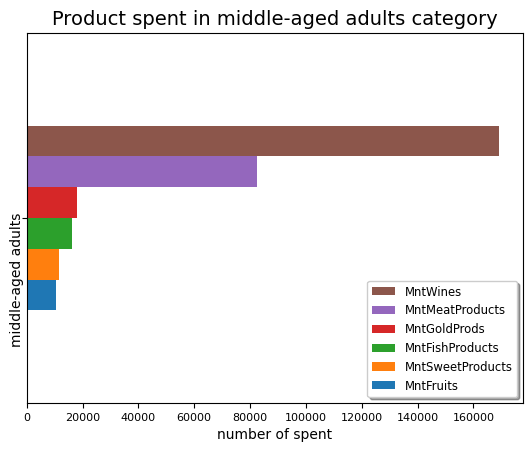

In [19]:
# data and plot graph
# barh
df_accept.groupby('age_category')[colsProd].agg('sum').loc['middle-aged adults'].to_frame().T \
    .sort_values(by='middle-aged adults', axis=1) \
    .plot(kind='barh')

# title
plt.title("Product spent in middle-aged adults category", fontsize=14)

# xlabel and ylabel
plt.yticks(rotation=90, ha='center')
plt.xticks(fontsize=8)
plt.xlabel("number of spent")

# customize the legend
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order of items in legend
order = [5,4,3,2,1,0]
# add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize='small', fancybox=True, shadow=True) 

# show
plt.show();

#### Confidence interval for each age category **proportion**

In [20]:
# CI proportion for each age category

# age category
age_category = [i for i in dfAgeProd.index]
for i in age_category:
    n_age = len(df_accept.loc[df["age_category"]  == i])
    n_df = len(df_accept)
    p = n_age/n_df
    # CI for proportion
    z = 1.96
    # lower and upper
    lower = p - 1.96 * np.sqrt(p * (1 - p) / n_age)
    upper = p + 1.96 * np.sqrt(p * (1 - p) / n_age)
    # display the result
    print(f"proportion of {i} --> {round(p, 3)} with lowerbound: {round(lower, 3)} and upperbound: {round(upper, 3)}")

proportion of adults --> 0.35 with lowerbound: 0.286 and upperbound: 0.414
proportion of middle-aged adults --> 0.511 with lowerbound: 0.455 and upperbound: 0.566
proportion of old adults --> 0.136 with lowerbound: 0.062 and upperbound: 0.21
proportion of teenagers --> 0.003 with lowerbound: -0.076 and upperbound: 0.083


#### Confidence interval for **mean** of total spent of product in each age category

In [21]:
df_CImean = df_accept.groupby("age_category").agg({"total_amount": [np.mean, np.std, np.size]})
df_CImean

total_amount                 
                           mean         std size
age_category                                    
adults               963.352113  748.212034  213
middle-aged adults   990.646302  644.558541  311
old adults          1145.060241  638.191564   83
teenagers            743.500000  878.933729    2

In [22]:
for i in age_category:
    # mean (point estimate)
    mean = df_CImean.loc[i][0]
    # calculate CI for mean
    lower = mean - 1.96 * df_CImean.loc[i][1] / np.sqrt(df_CImean.loc[i][2])
    upper = mean + 1.96 * df_CImean.loc[i][1] / np.sqrt(df_CImean.loc[i][2])
    # display the CI for mean
    print(f"confidence interval for mean (total_amount) of {i} is between {round(lower, 2)} and {round(upper, 2)}")

confidence interval for mean (total_amount) of adults is between 862.87 and 1063.83
confidence interval for mean (total_amount) of middle-aged adults is between 919.01 and 1062.28
confidence interval for mean (total_amount) of old adults is between 1007.76 and 1282.36
confidence interval for mean (total_amount) of teenagers is between -474.64 and 1961.64


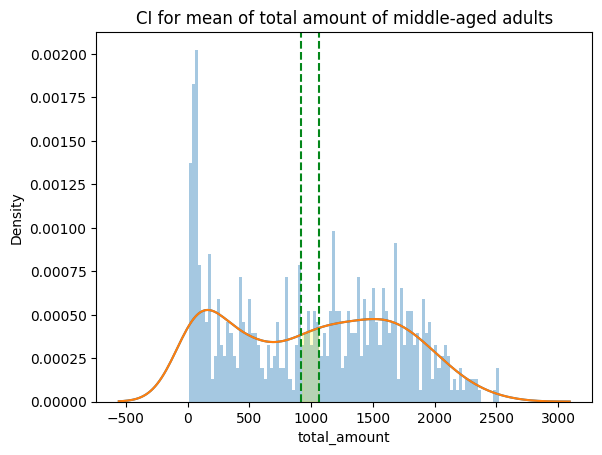

In [23]:
# median of income
median = df_accept['Income'].median()

# set graph's title
plt.title("CI for mean of total amount of middle-aged adults")

# distribution plot & get x and y daya
line = sns.distplot(df_accept['total_amount'], bins=100).get_lines()[0]
plt.plot(line.get_xdata(), line.get_ydata())
kde_x, kde_y = line.get_xdata(), line.get_ydata()

# mark where medium income is located
plt.fill_between(
    kde_x, kde_y,
    where=(kde_x > 919.01) & (kde_x < 1062.28), 
    color='yellow', 
    alpha=0.2
)

# mark median and the spread
plt.axvline(x=919.01, color='#04871a', linestyle='--')
plt.axvline(x=1062.28, color='#04871a', linestyle='--')

# show graph
plt.show()

**_Insight_**:
<br>
Average spent of middle-aged adults tend to be **medium spent**, but keep in mind that the proportion of middle-aged adults is 45.5% to 56.6% of population, so it can be said that the spent of middle-aged adults is **high**, because it represents **more than 50% of the population**. So we can conclude that middle-aged adults spent more on `wines` with an `average amount of 919.01 to 1062.28`.

#### <u>product apa yang sering dibeli oleh kategori customer berdasarkan jawaban pertanyaan no.2 ?<u>

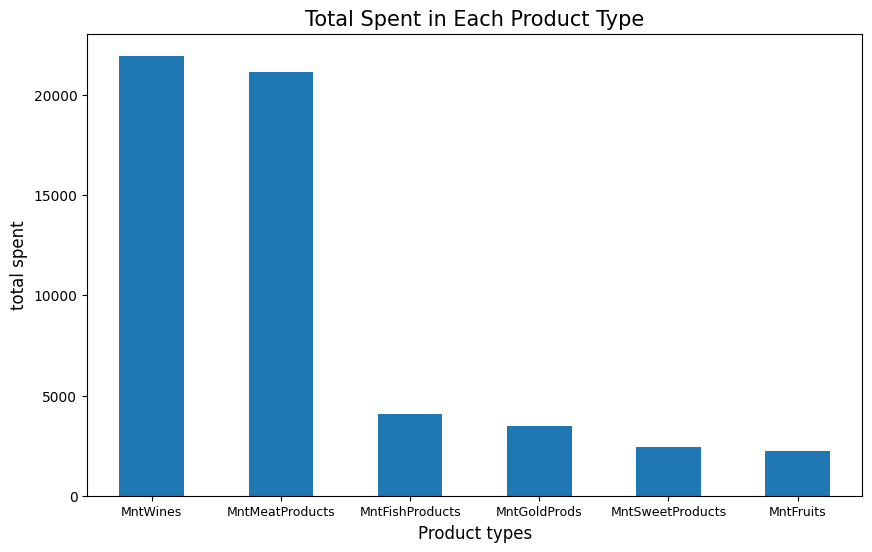

In [42]:
# plot the data
df_accept.loc[(df_accept.age_category == 'middle-aged adults') & (df_accept.Marital_Status == 'Married') & (df_accept.has_child == 'No') & (df_accept.Education == 'Graduation') & (df_accept.income_category == 'high income')][colsProd]\
    .sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

# title
plt.title("Total Spent in Each Product Type", fontsize=15)

# set x and y label
plt.ylabel("total spent", fontsize=12)
plt.xlabel("Product types", fontsize=12)
plt.xticks(fontsize=9)

# rotate x label
plt.tick_params(axis='x', labelrotation=360);

Confidence interval for mean in Wines and Meat product (because based on the graph above wines and meat are mostly purchased by customers)

In [41]:
# DataFrame based on categorical according to the answer of question-2
dfCat = df_accept.loc[(df_accept.age_category == 'middle-aged adults') & (df_accept.Marital_Status == 'Married') & (df_accept.has_child == 'No') & (df_accept.Education == 'Graduation') & (df_accept.income_category == 'high income')]

# products that make the most money (spent)
prodMost = ['MntWines', 'MntMeatProducts']

# CI for mean in prodMost
for prod in prodMost:
    # mean and std
    mean = dfCat[prod].mean()
    std = dfCat[prod].std()
    # get the lowerbound and upperbound
    lower = mean - 1.96 * std / np.sqrt(len(dfCat))
    upper = mean + 1.96 * std / np.sqrt(len(dfCat))
    print(f"confidence interval for mean (total_amount) of {prod[prod.find('t')+1:prod.find('P')]} is between {round(lower, 2)} and {round(upper, 2)}")

confidence interval for mean (total_amount) of Wine is between 524.35 and 730.33
confidence interval for mean (total_amount) of Meat is between 528.86 and 680.05


**_Insight_**:
<br>
Customer dengan kategori: middle-aged adults, married, has no child, graduation education level, and high income lebih sering membeli produk `Wine` dengan rata-rata spent sebesar `524.35 sampai 730.33` dan produk `Meat` dengan rata-rata spent sebesar `528.86 sampai 680.05`.

>### 4. Bagaimana pengaruh setiap kategory (age_category, education, income_category, marital_status, has_child) terhadap **place** ?

place columns: NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

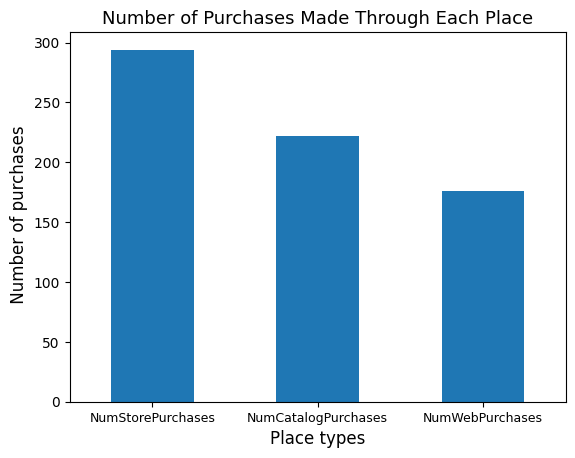

In [83]:
# place columns
placeCols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# plot data
dfCat[placeCols].sum().sort_values(ascending=False).plot(kind='bar')

# title
plt.title("Number of Purchases Made Through Each Place", fontsize=13)

# set x and y label
plt.ylabel(" Number of purchases", fontsize=12)
plt.xlabel("Place types", fontsize=12)
plt.xticks(fontsize=9)

# rotate x label
plt.tick_params(axis='x', labelrotation=360);

**_Insight_**:
<br>
The highest number of purchases made by customers is through the `website`

-----------
-----------

In [147]:
# promotion columns
colsCamp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df_accept_melted = df_accept.melt(
    id_vars='age_category', 
    value_vars=colsCamp,
    value_name='accepted_campaign_ke-n' 
)

df_accept_melted

,age_category,variable,accepted_campaign_ke-n
0,middle-aged adults,AcceptedCmp1,0
1,adults,AcceptedCmp1,0
2,old adults,AcceptedCmp1,0
3,old adults,AcceptedCmp1,1
4,old adults,AcceptedCmp1,1
...,...,...,...
3040,middle-aged adults,AcceptedCmp5,0
3041,adults,AcceptedCmp5,0
3042,middle-aged adults,AcceptedCmp5,0
3043,old adults,AcceptedCmp5,1


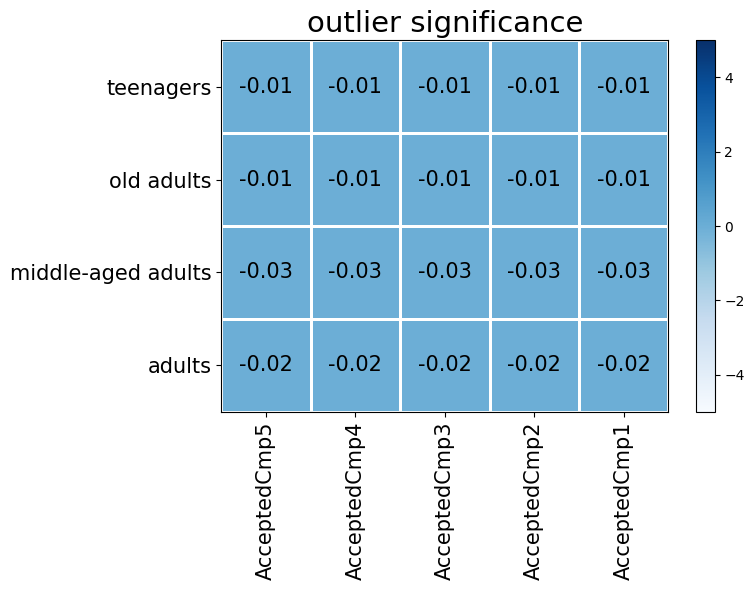

In [148]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

# outlier significance correlation
outlier_significance_overview = df_accept_melted[['age_category', 'variable']].outlier_significance_matrix()

plot_correlation_matrix(outlier_significance_overview.values, x_labels=outlier_significance_overview.columns, y_labels=outlier_significance_overview.index, 
                        vmin=-5, vmax=5, color_map='Blues', title='outlier significance', fontsize_factor=1.5,
                        figsize=(8,6))

plt.tight_layout()

# SUMMARY from all QUESTION (WARNING)

----------
----------
----------

>#### looking at the relationship between age category, marital status, salary category, and having children or not to the promotion column

In [26]:
# # correlation between age category, marital status, salary category, and having children or not to the promotion column

# # import module
# import phik
# from phik.report import plot_correlation_matrix
# from phik import report

# # phik correlation among those columns
# phik_overview = df[['age_category','Marital_Status', 'income_category', 'has_child', \
#                     'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].phik_matrix(interval_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

# plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
#                         vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
#                         figsize=(7,5.5))

# # significance among those columns
# significance_overview = df[['age_category','Marital_Status', 'income_category', 'has_child', \
#                             'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].significance_matrix(interval_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])

# plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
#                         y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
#                         usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

# plt.tight_layout()

In [27]:
# promotion columns
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# display DataFrame promotion vs age category
display(df.groupby('age_category')[cols].agg('sum'),
        df.groupby('Marital_Status')[cols].agg('sum'),
        df.groupby('income_category')[cols].agg('sum'),
        df.groupby('has_child')[cols].agg('sum')
)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
age_category,,,,,
adults,57,8,75,42,66
middle-aged adults,63,20,72,99,68
old adults,24,2,15,26,28
teenagers,0,0,1,0,1


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Marital_Status,,,,,
Divorced,12,5,20,18,13
Married,95,19,100,106,110
Single,32,5,39,33,32
Widow,5,1,4,10,8


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
income_category,,,,,
high income,121,16,44,78,154
low income,0,0,41,1,0
medium income,23,14,78,88,9


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
has_child,,,,,
No,110,18,48,69,138
Yes,34,12,115,98,25


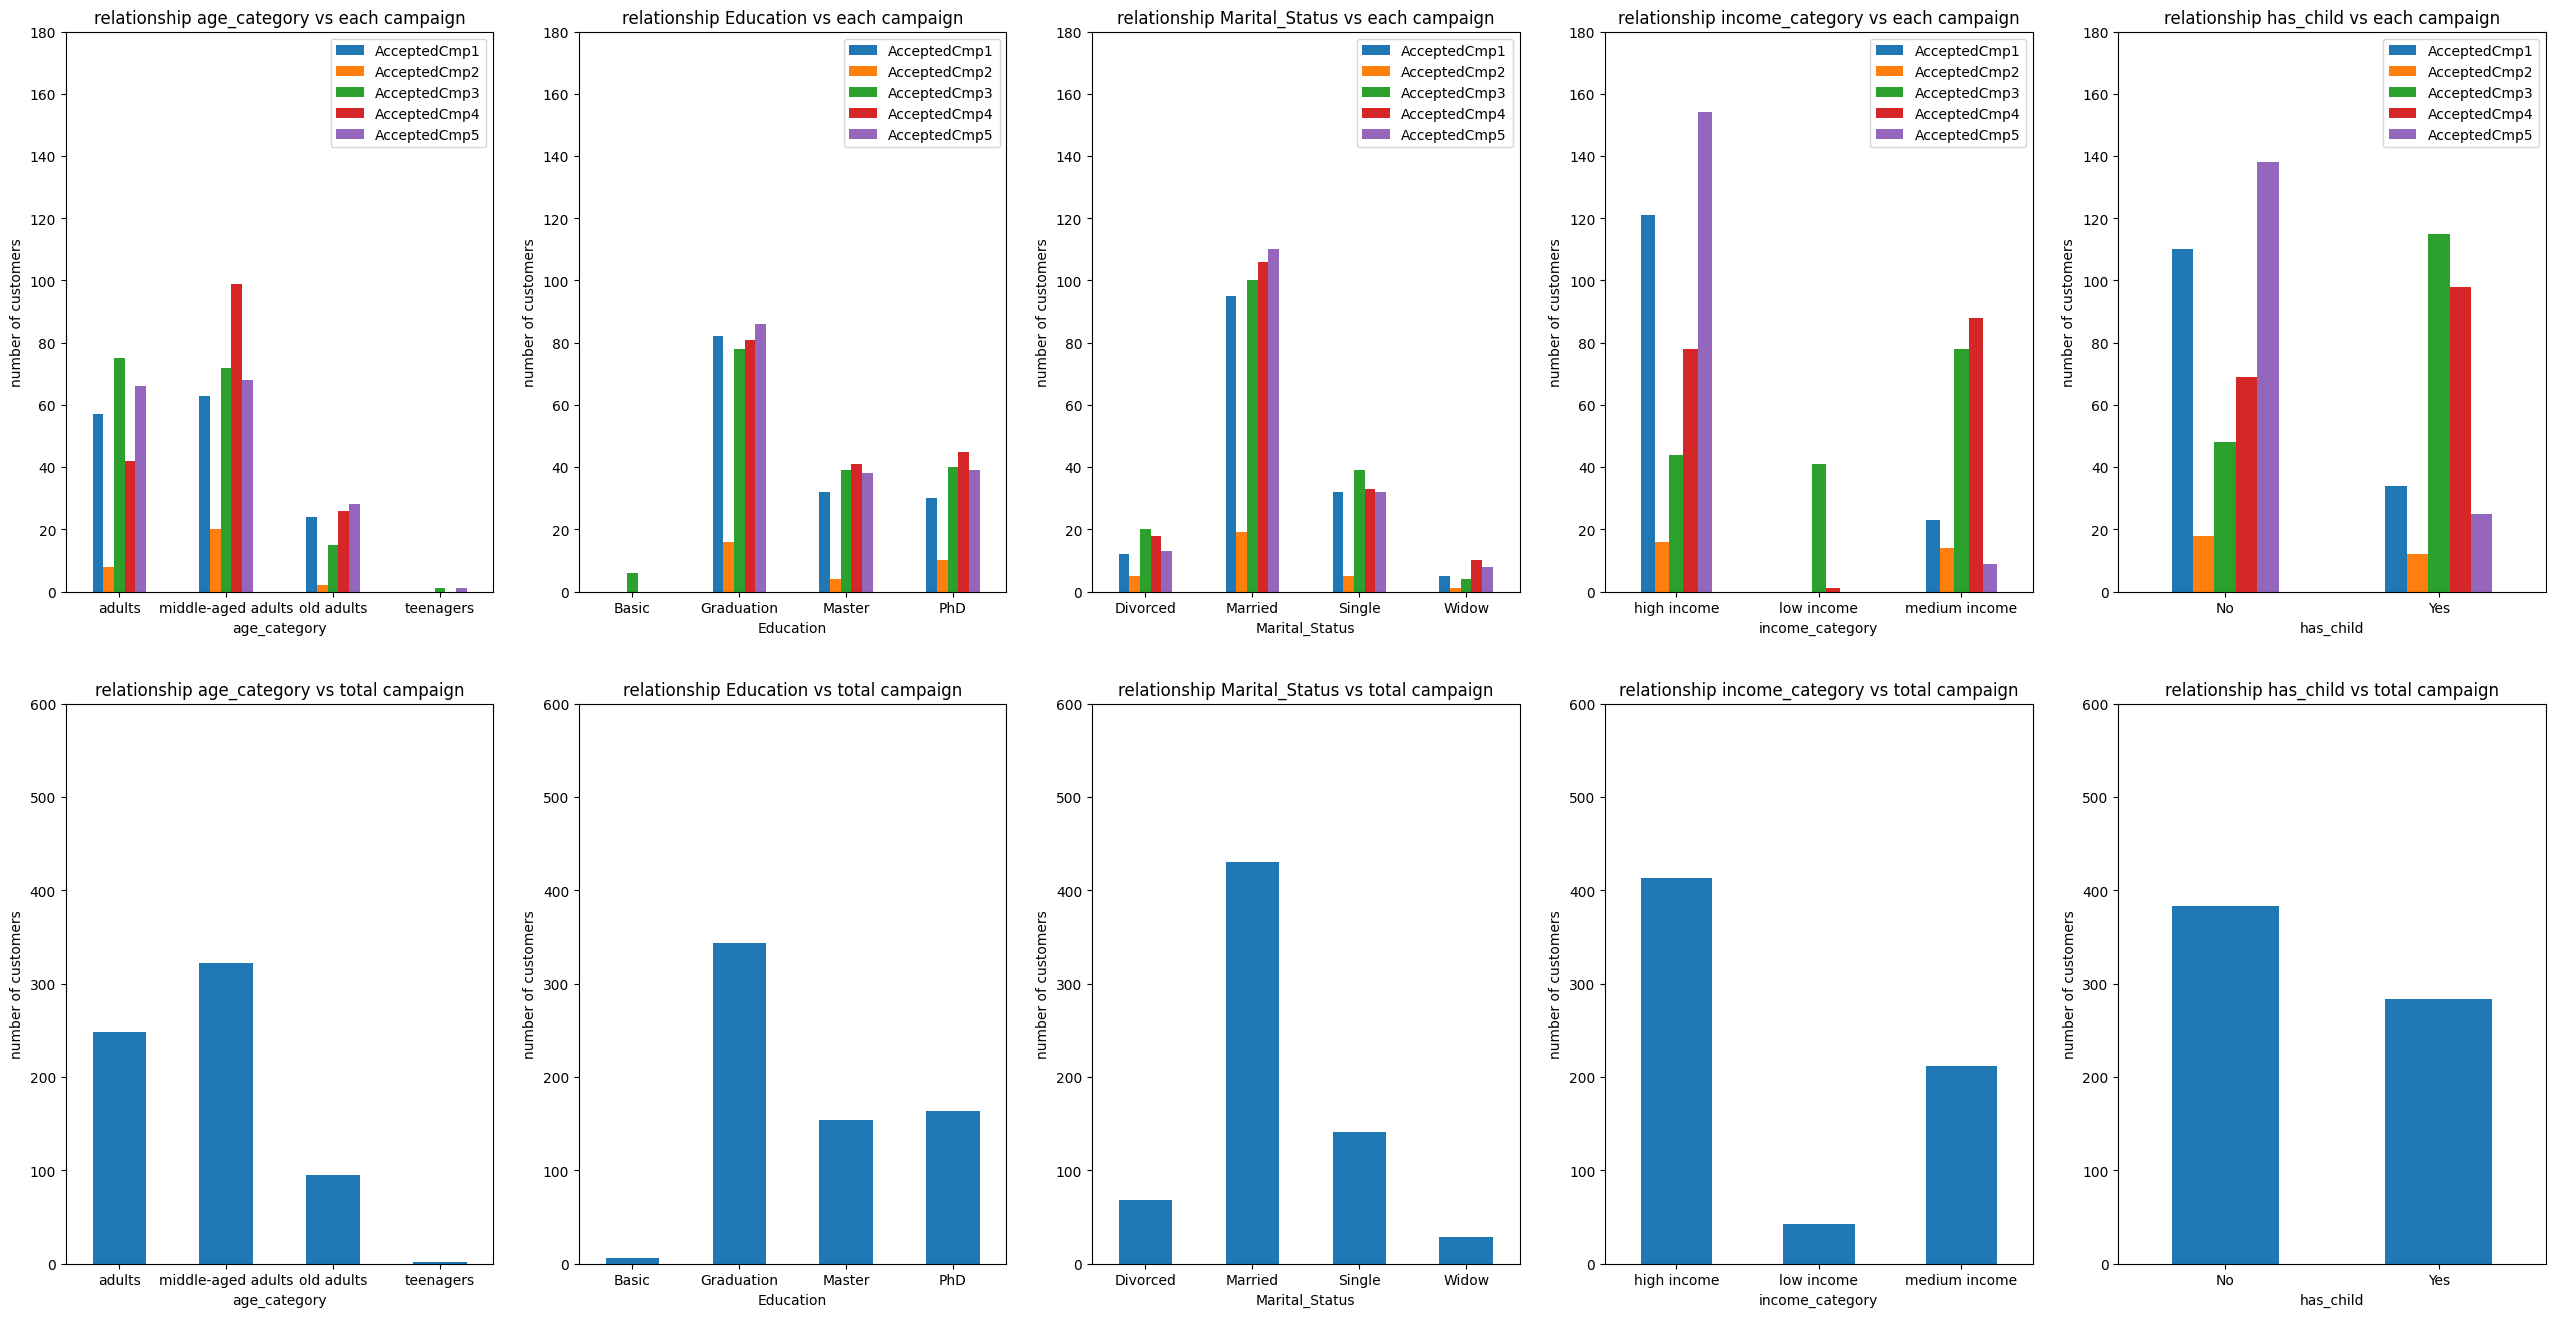

In [28]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize=(32,16))

axEach = [ax1,ax2,ax3,ax4,ax5]
axTotal = [ax6,ax7,ax8,ax9,ax10]
colList = ['age_category', 'Education', 'Marital_Status', 'income_category', 'has_child']
titleEach = ['relationship age_category vs each campaign', 'relationship Education vs each campaign', 'relationship Marital_Status vs each campaign', 'relationship income_category vs each campaign', 'relationship has_child vs each campaign']
titleTotal = ['relationship age_category vs total campaign', 'relationship Education vs total campaign', 'relationship Marital_Status vs total campaign', 'relationship income_category vs total campaign', 'relationship has_child vs total campaign']

for i in zip(axEach, axTotal, colList, titleEach, titleTotal):
    # data
    df.groupby(i[2])[cols].agg('sum').plot(kind='bar', ax=i[0])
    df.groupby(i[2])[cols].agg('sum').sum(axis=1).plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[3])
    i[1].set_title(i[4])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of customers')
    i[1].set_ylabel('number of customers')
    # set y limit
    i[0].set_ylim(bottom=0, top=180)
    i[1].set_ylim(bottom=0, top=600)

insight:
1. It can be seen from the graph above that, in each category, age, marital status, salary, have children/no, the trend **decreases** from the first campaign to the second campaign, then tends to always **increase** from the second campaign to the fifth campaign.
2. When viewed from the age category, those who accept the most campaigns are **middle-aged adults (40 years to 59 years)**
3. When viewed from marital status, those who accept the most campaigns are **married**
4. When viewed from the salary category, those who accept the most campaigns are salaries in the **high income category**
5. When viewed from having children or not, those who accept the most campaigns are **those who do not have children**

-----------------

-----------------------

In [29]:
quantile_income = fnc1.checkquantiles(df, 'Income')
# iqr
iqr = quantile_income[3] - quantile_income[1]

upperbound = quantile_income[3] + (1.5 * iqr)

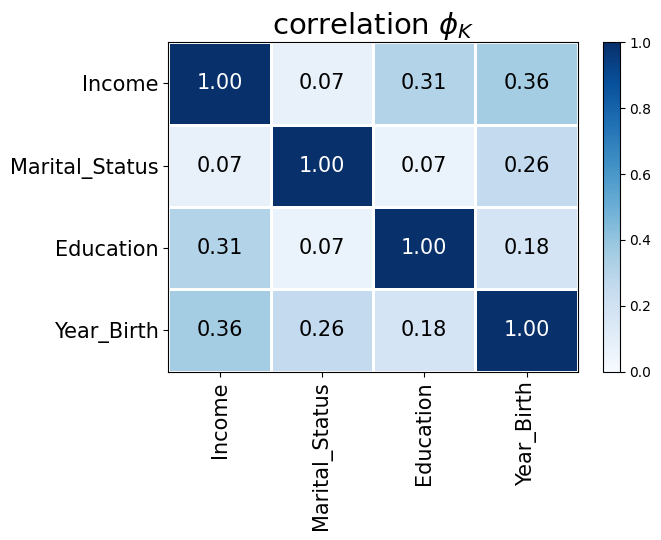

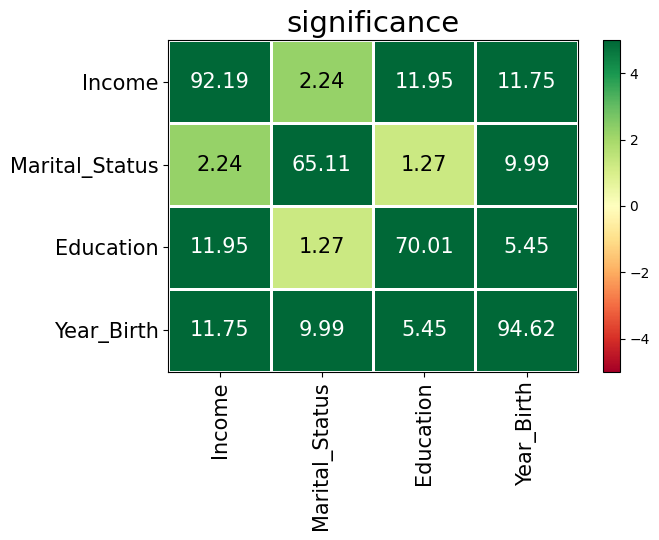

In [30]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df.loc[~(df['Income'] > upperbound)][['Year_Birth','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df.loc[~(df['Income'] > upperbound)][['Year_Birth','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

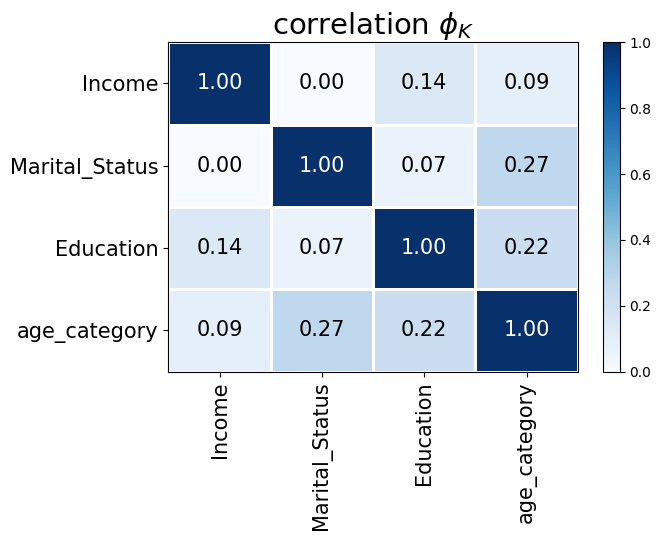

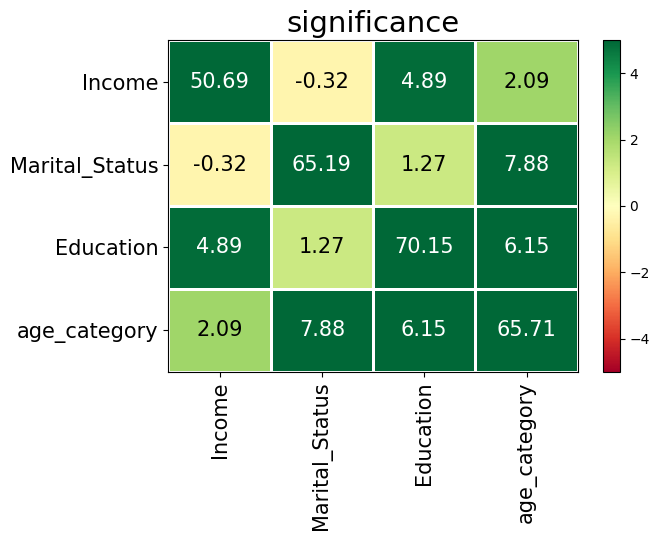

In [31]:
# correlation between Year_Birth, Education, Marital Status, and Income using phik correlation package

# import module
import phik
from phik.report import plot_correlation_matrix
from phik import report

# phik correlation
phik_overview = df[['age_category','Education', 'Marital_Status', 'Income']].phik_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))

# significance between those columns
significance_overview = df[['age_category','Education', 'Marital_Status', 'Income']].significance_matrix(interval_cols=['Year_Birth', 'Income'])

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(7,5.5))

plt.tight_layout()

-------------------------------

----------------------

> ### make variable contains create a variable that contains column names based on the category in .pdf

In [32]:
people = ['ID', 'Year_Birth', 'age', 'age_category', 'Education', 'Marital_Status', 'Income', 'num_children', 'Dt_Customer', 'Recency', 'Complain']
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
promotion = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [33]:
# sns.distplot(df['age'], kde=True);
# plt.axvline(x=df['age'].mean(), c='red', label='mean')
# plt.axvline(x=df['age'].median(), c='b', label='median')
# plt.legend()

# from scipy.stats import shapiro

# # check the distribution
# stats, pvalue = shapiro(df['age'])
# # check the pvalue
# if pvalue > 0.05:
#         print(f"pvalue: {pvalue}. So, age has normal distribution")
# else:
#         print(f"pvalue: {pvalue}. So, age has NOT normal distribution")

> ### exploration in Place: NumWebPurchases, NumWebVisitsMonth, NumCatalogPurchases, NumStorePurchases.

<Axes: xlabel='MntWines'>

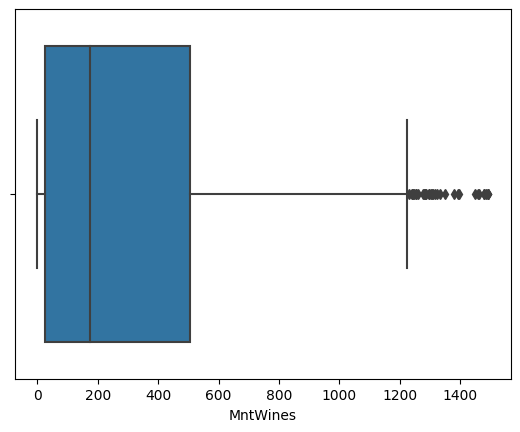

In [34]:
sns.boxplot(df, x='MntWines')

In [35]:
mntwines = fnc.checkquantiles(df, 'MntWines')
upperbound = mntwines[3] + (1.5 * (mntwines[3] - mntwines[1]))
df.loc[df['MntWines'] > upperbound]

NameError: name 'fnc' is not defined

In [ ]:
dftrial = df[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(['Marital_Status','Education']).agg('sum').reset_index()
dftrial

,Marital_Status,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Divorced,Basic,0,1,3,10,6,9,1,0,3,8
1,Divorced,Graduation,35769,3929,19395,4472,3949,5839,495,332,697,636
2,Divorced,Master,19229,1316,8539,1854,1552,2885,267,147,341,343
3,Divorced,PhD,20366,1117,6911,1794,715,2006,237,141,309,286
4,Married,Basic,332,431,454,701,488,841,69,13,99,238
5,Married,Graduation,207331,21307,128290,30888,22354,36328,3003,1930,4230,3815
6,Married,Master,100620,9115,51945,13695,9500,15260,1480,915,2164,2005
7,Married,PhD,128427,6085,55640,7900,5879,9507,1347,962,1889,1628
8,Single,Basic,56,165,137,176,153,352,30,12,49,120
9,Single,Graduation,66347,8251,47554,11382,7418,12907,1007,688,1430,1339


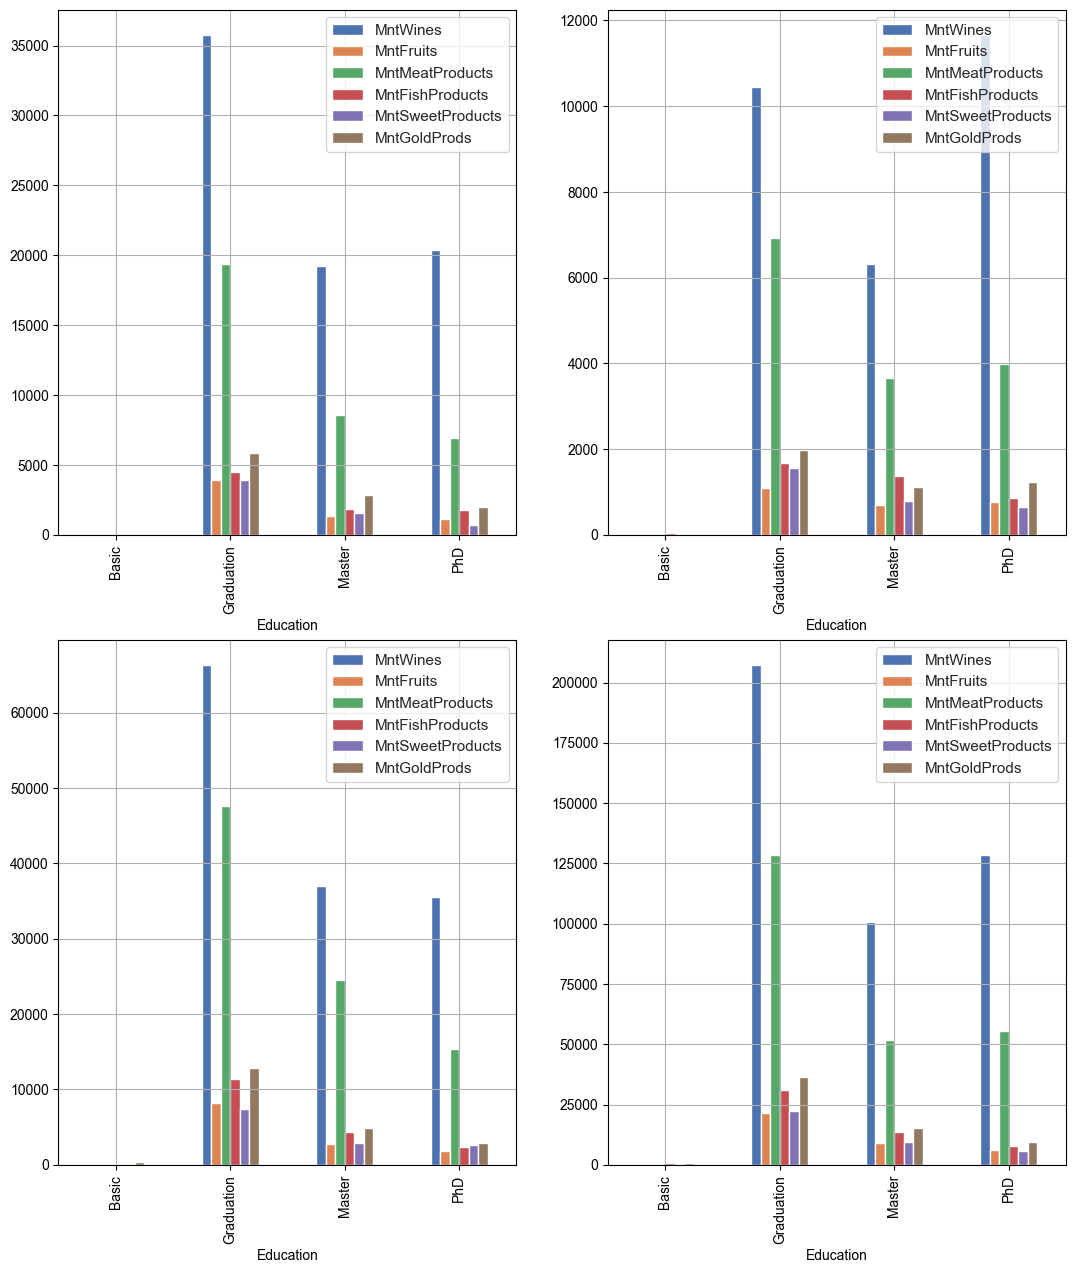

In [ ]:
dftrial_divorced = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Divorced'")

dftrial_widow = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Widow'")

dftrial_single = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Single'")

dftrial_married = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Married'")


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13,15))

rows1 = [ax1,ax2]
rows2 = [ax3,ax4]
dflist1 = [dftrial_divorced, dftrial_widow]
dflist2 = [dftrial_single, dftrial_married]
label1 = ['Divorced', 'Widow']
label2 = ['Single', 'Married']



for i in zip(dflist1, dflist2, rows1, rows2, label1, label2):
    sns.set_theme(style="whitegrid")
    i[0].plot(kind='bar',x='Education',ax=i[2],label=i[-2])
    i[1].plot(kind='bar',x='Education',ax=i[3],label=i[-1])

In [ ]:
df.query("Income < 700000")

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
0,5524,1957,55,Graduation,Single,58138.000000,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.000000,2,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,old adults
2,4141,1965,48,Graduation,Married,71613.000000,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,middle-aged adults
3,6182,1984,30,Graduation,Married,26646.000000,1,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11,adults
4,5324,1981,33,PhD,Married,58293.000000,1,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,42,Graduation,Married,42075.500000,2,2013-03-03,82,0,71,1,16,0,0,9,4,0,0,0,0,0,0,2,1,3,8,3,11,middle-aged adults
2236,10339,1954,59,Master,Married,52884.500000,1,2013-06-23,83,0,161,0,22,0,0,24,2,0,0,0,0,0,0,4,1,4,6,3,11,middle-aged adults
2237,3117,1955,58,Graduation,Single,59925.000000,1,2013-10-18,95,0,264,0,21,12,6,147,3,0,0,0,0,0,0,6,1,5,7,3,11,middle-aged adults
2238,5250,1943,70,Master,Widow,71335.500000,0,2013-10-30,75,0,532,126,490,164,126,126,1,0,0,0,0,1,1,5,5,11,1,3,11,old adults


<Axes: xlabel='Year_Birth', ylabel='Income'>

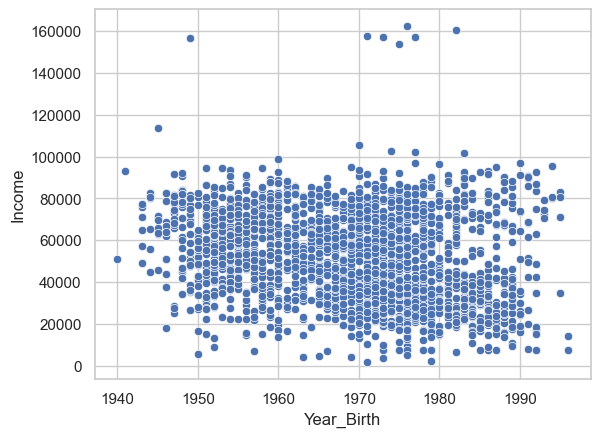

In [ ]:
sns.scatterplot(df.query("Income < 600000"), x='Year_Birth', y='Income')
# plt.ylim(700_000)

-----------------